## **Crafting a Story from a Dataset - Exercise**

## **Adult Income**

##### **About Dataset**

This dataset comes from the UCI repository of machine learning databases. The task is to predict if an individual's annual income excceds $50,000 based on census data. More details are available in the original UCI documentation

Acknowledgements
This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html

The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

####  Attribute Information:
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, * Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines,  Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, * Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* class: >50K, <=50K



### Gathering Data & Pre-processing

In [242]:
# import libiraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [243]:
#data import
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Cleaning, transforming and visualizing

In [244]:
df.shape

(48842, 15)

In [245]:
#check for missing datas
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [247]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


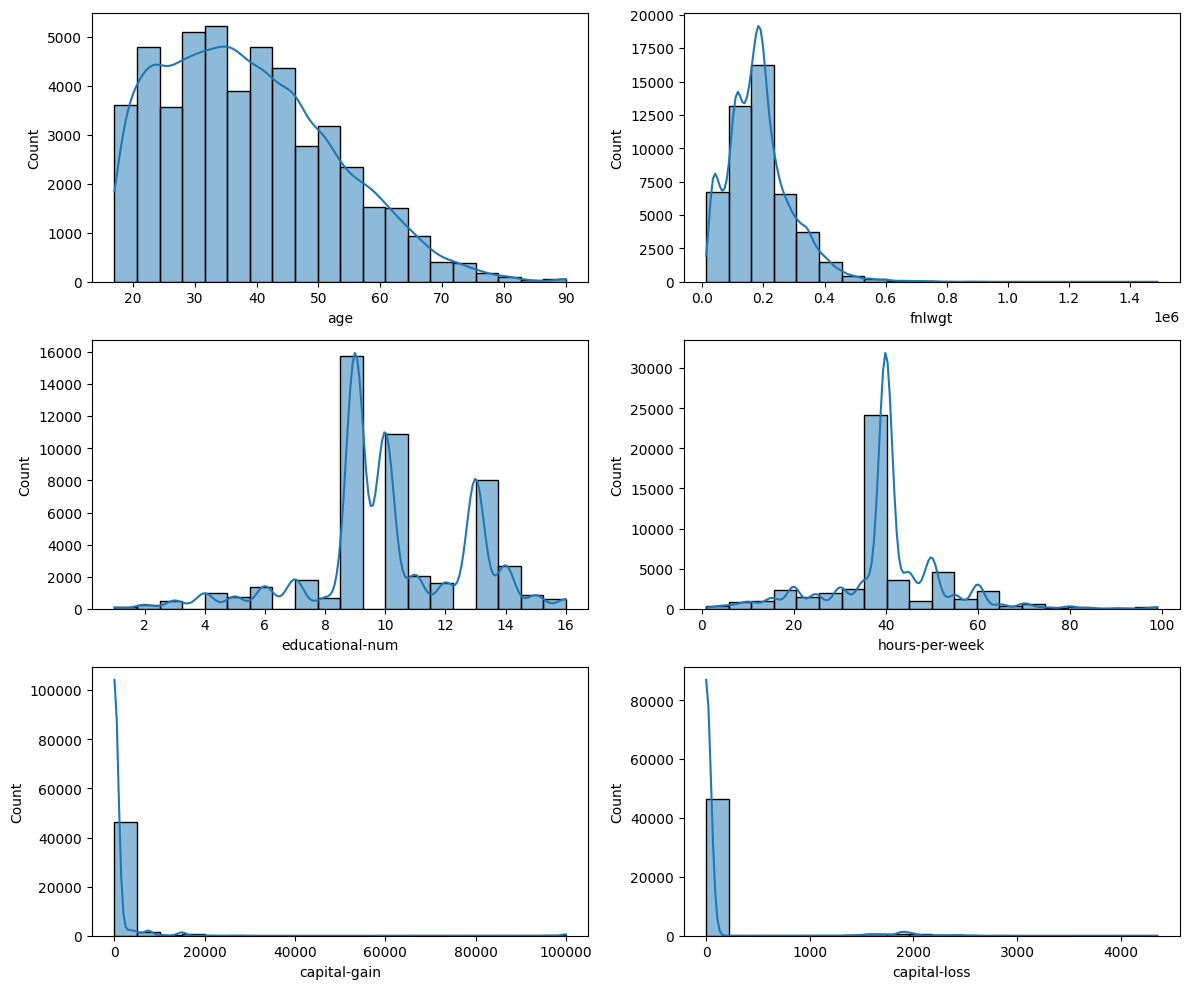

In [248]:
# Explore the distribution of numerical columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(['age','fnlwgt','educational-num', 'hours-per-week', 'capital-gain', 'capital-loss']):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], bins=20, kde=True)
plt.tight_layout()
plt.show()

Looks like we can drop 'fnlwgt' (no clue), 'capital-gain' and 'capital-loss' columns since most of the values are not even in quantile range.

In [249]:
# checking for '?' in datasets 
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Since data with  '?' represent 5% of the dataset i will drop all

In [250]:
# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Drop rows containing NaN values
df.dropna(inplace=True)

In [251]:
#check again for '?' 
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [252]:
#check for duplicates
df.duplicated().sum()

47

In [253]:
#remove duplicates 
df = df.drop_duplicates() 
#check again
df.duplicated().sum()

0

In [254]:
print(df['education'].unique())
print(sorted(df['educational-num'].unique()))# sorted 

['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [255]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


Judging by the results both columns represents the same infomation, so i will keep only one 'educational-num' column.

In [256]:
df.drop(['capital-gain', 'capital-loss','education','fnlwgt','relationship'],axis=1,inplace=True)
df.head()

,age,workclass,educational-num,marital-status,occupation,race,gender,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,White,Male,30,United-States,<=50K


In [257]:
#Run value counts only on Non-number columns for distribution of categoircal values
for col in df.select_dtypes(include='object').columns: 
    print("\n******",col.upper(),"*******")
    print(df[col].value_counts())
    


****** WORKCLASS *******
workclass
Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64

****** MARITAL-STATUS *******
marital-status
Married-civ-spouse       21042
Never-married            14567
Divorced                  6294
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: count, dtype: int64

****** OCCUPATION *******
occupation
Craft-repair         6010
Prof-specialty       6001
Exec-managerial      5980
Adm-clerical         5535
Sales                5405
Other-service        4805
Machine-op-inspct    2965
Transport-moving     2316
Handlers-cleaners    2045
Farming-fishing      1475
Tech-support         1419
Protective-serv       975
Priv-house-serv       230
Armed-Forces           14
Name: count, dtype: int64

****** RACE *******
race
White        

### EDA

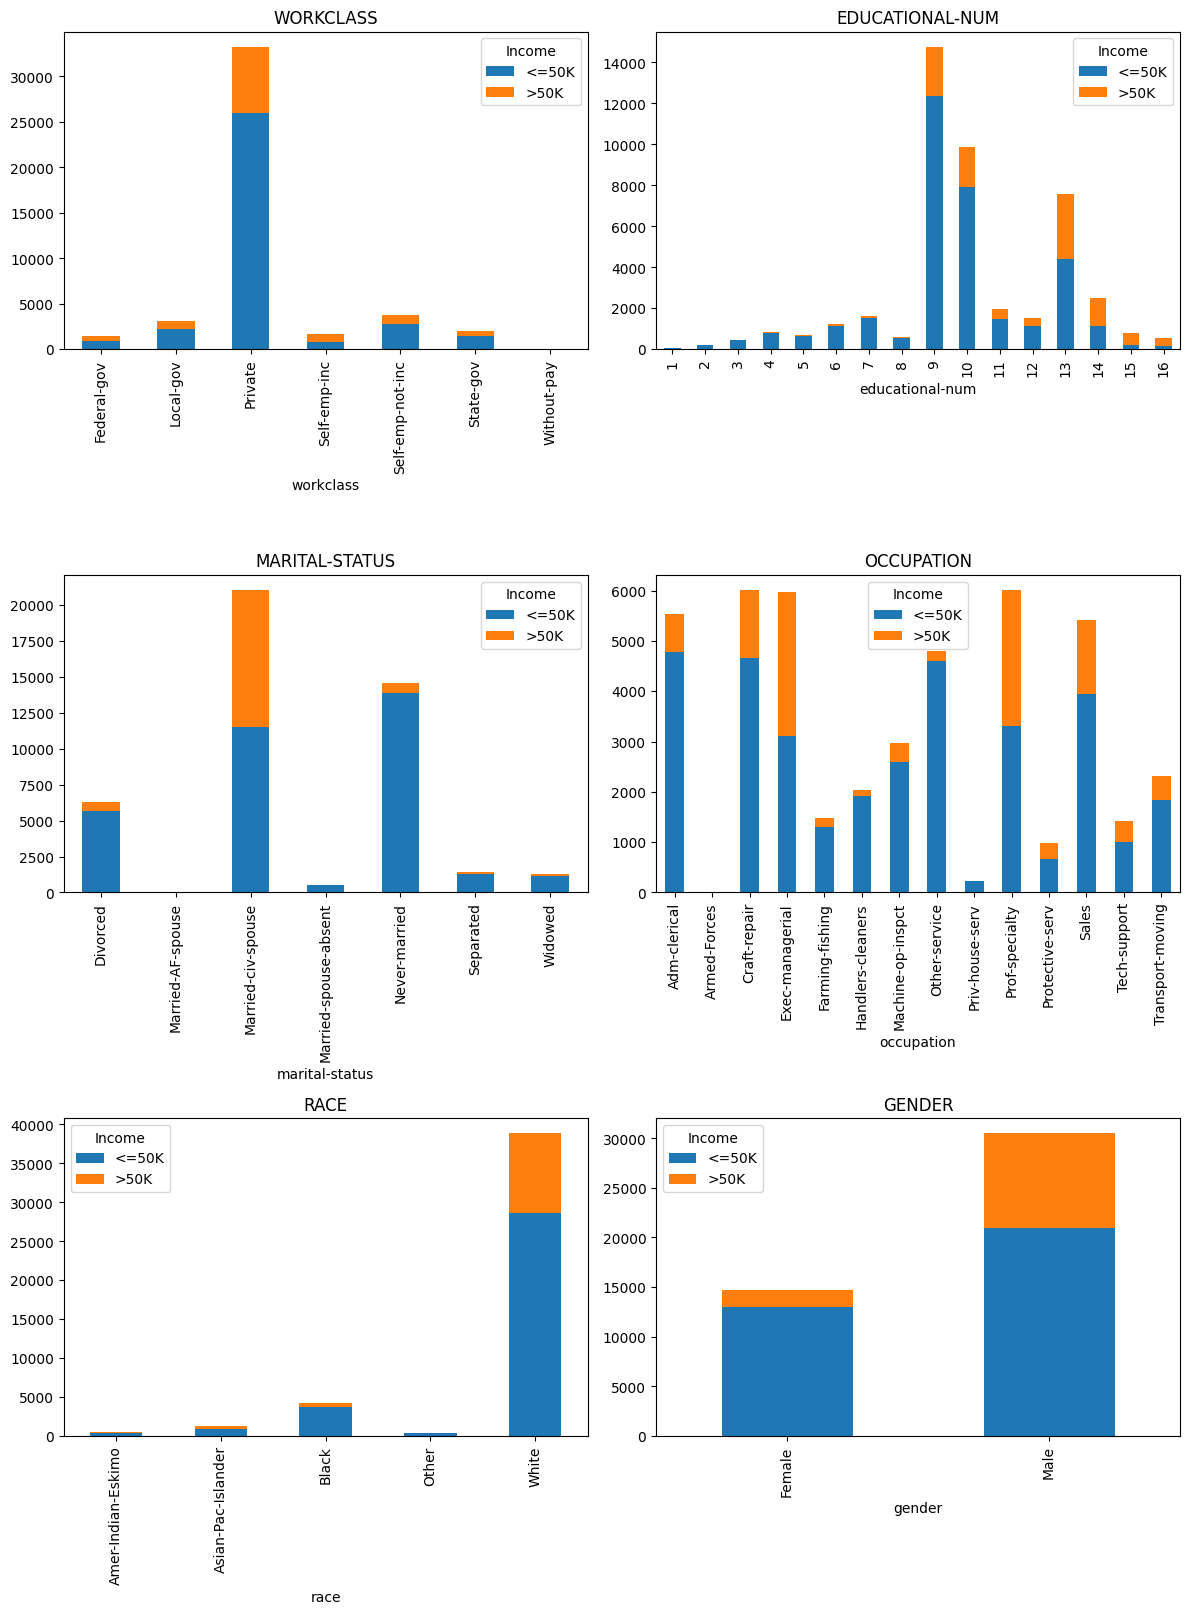

In [258]:
# Define the list of categorical columns
categorical_cols = ['workclass', 'educational-num', 'marital-status', 'occupation', 'race', 'gender']

plt.figure(figsize=(12, 20))
for i, col in enumerate(categorical_cols):
    # Create a cross-tabulation between the categorical column and 'income'
    cross_tab = pd.crosstab(df[col], df['income'])

    # Plot the stacked bar plot
    plt.subplot(4, 2, i+1)
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(col.upper())
    plt.xticks(rotation=90)
    plt.legend(title='Income')

plt.tight_layout()
plt.show()

In [259]:
df.income = df.income.map({'>50K':True,'<=50K':False})

In [260]:
df = df.rename(columns={'income': 'over50k','educational-num':'education'})

In [261]:
df.head()

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,over50k
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,40,United-States,False
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,False
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,40,United-States,True
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,True
5,34,Private,6,Never-married,Other-service,White,Male,30,United-States,False


### Correlation between education and over50k

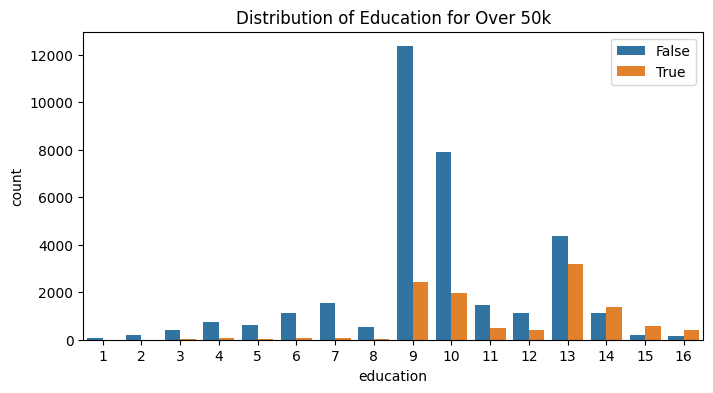

In [262]:
# Plot the distribution of education for over50k
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x='education',data=df,hue='over50k')
plt.title('Distribution of Education for Over 50k')
plt.legend()
plt.show()

### Gender and income

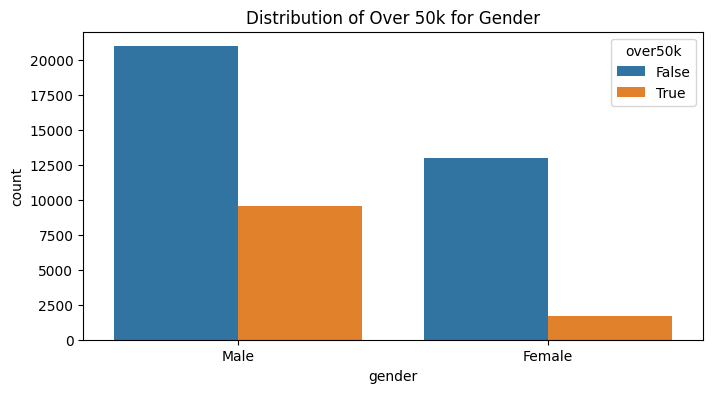

In [263]:
plt.figure(figsize=(8,4))
sns.countplot(x='gender',data=df,hue='over50k')
plt.title('Distribution of Over 50k for Gender')
plt.show()

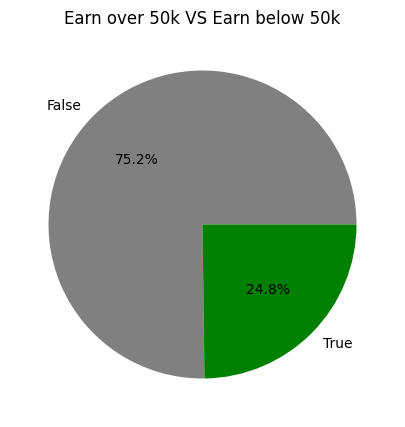

In [264]:
plt.figure(figsize=(8,5))
plt.pie(df.over50k.value_counts(), labels=df.over50k.value_counts().index, autopct='%1.1f%%',colors=['gray','green'])
plt.title('Earn over 50k VS Earn below 50k')
plt.show()

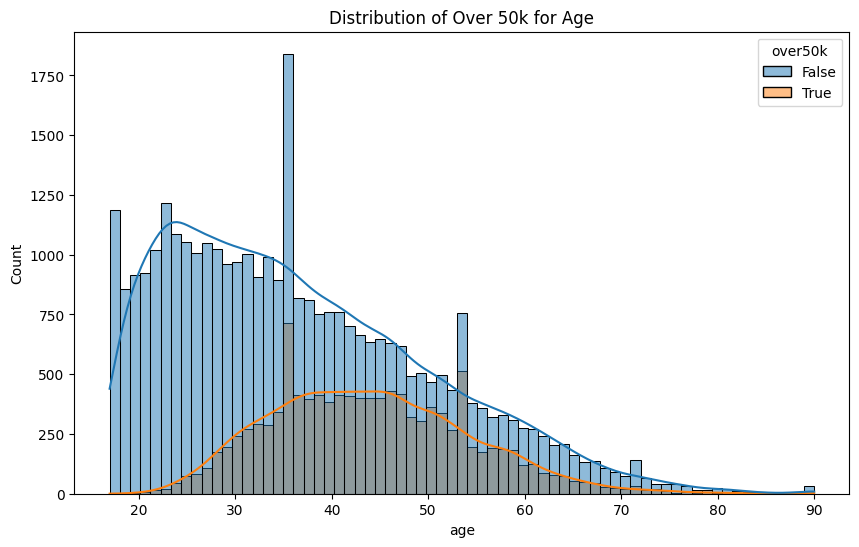

In [265]:
plt.figure(figsize=(10,6))
sns.histplot(x='age',data=df, hue='over50k',kde=True)
plt.title('Distribution of Over 50k for Age')
plt.show()

In [266]:
df.head()

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,over50k
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,40,United-States,False
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,False
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,40,United-States,True
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,True
5,34,Private,6,Never-married,Other-service,White,Male,30,United-States,False


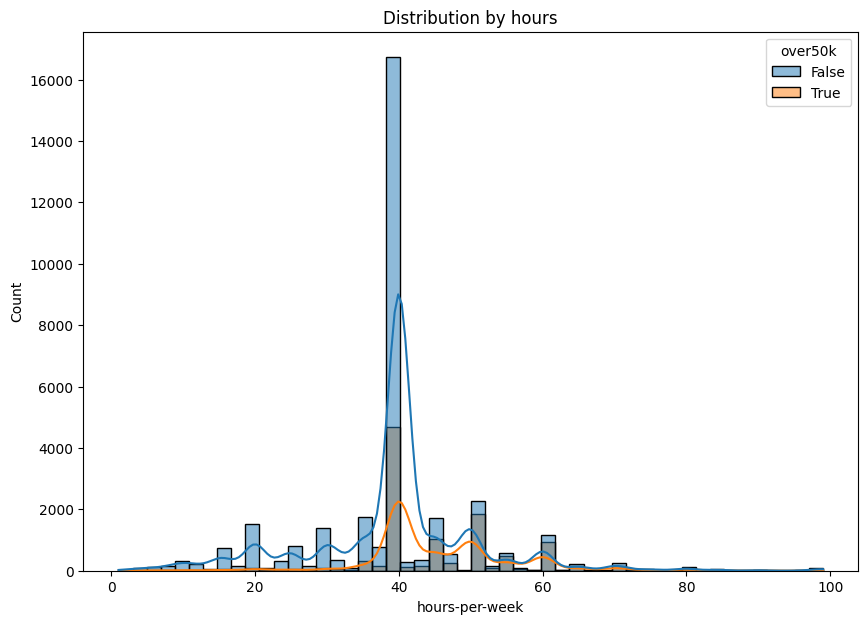

In [267]:
plt.figure(figsize=(10,7))
sns.histplot(x='hours-per-week',bins=50,data=df, hue='over50k',kde=True)
plt.title('Distribution by hours')
plt.show()

# Featuring and modelling

In [268]:
df =pd.get_dummies(df.drop('native-country',axis=1), dtype=int)
df.head()

,age,education,hours-per-week,over50k,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,25,7,40,False,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,38,9,50,False,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,12,40,True,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,44,10,40,True,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,34,6,30,False,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [269]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define X (features) and y (target)
X = df.drop('over50k', axis=1)
y = df['over50k']
#scaled 

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

#spliting train and test data
X_train, X_test, y_train, y_test = train_test_split(X_Scaled,y,test_size=.1,random_state=37)


In [270]:
from sklearn.ensemble import RandomForestClassifier
# Applying Random Forest model
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

              precision    recall  f1-score   support

       False       0.90      0.85      0.87      3562
        True       0.54      0.64      0.58       956

    accuracy                           0.81      4518
   macro avg       0.72      0.75      0.73      4518
weighted avg       0.82      0.81      0.81      4518



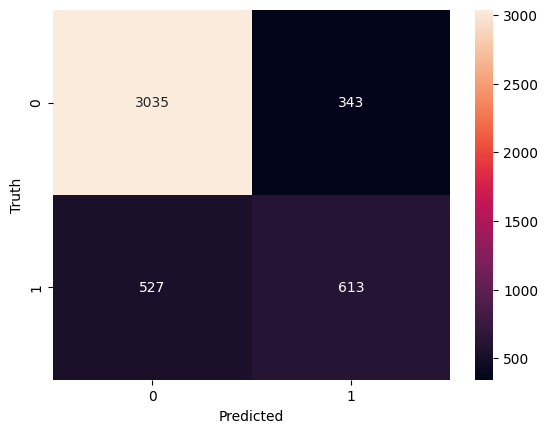

In [271]:
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)),fmt="", annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

print(classification_report(model.predict(X_test),y_test))

In [276]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance scores
print(feature_importance_df.reset_index(drop=True).head(10))

                             Feature  Importance
0                                age    0.286946
1                          education    0.179656
2                     hours-per-week    0.151977
3       marital-status_Never-married    0.082349
4  marital-status_Married-civ-spouse    0.060640
5            marital-status_Divorced    0.025498
6         occupation_Exec-managerial    0.021983
7                        gender_Male    0.018556
8          occupation_Prof-specialty    0.015510
9                      gender_Female    0.014426
